<center><br><font size=12> ML Project - Group 24</font><br>
    <br>
<br>
<b> Yahlly schein <b>     <br>
<b> Dor Bar <b>    <br>
<b> Dana Mashiah <b>    <br>

## Table of Content

- <a href="#Import-libs">Import libaries</a>
- <a href="#Part-A--Exploration">Part A- Data explortaion</a>
- <a href="#Part-B--Pre-processing">Part B- Pre processing</a>
- <a href="#Continue-Exploration">Part B.1- Continue Exploration</a>
- <a href="#Part-C---Modeling">Part C- Modeling</a>
- <a href="#Part-D---Evaluation">Part D- Evaluation</a>
- <a href="#Part-E---Predict">Part E- Predict</a>
- <a href="#Back-up">Back up</a>

# Import libs

In [1]:
#General
import pandas as pd
import numpy as np
from scipy import stats

#Plotting
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno 

# Modeling
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler , RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc , roc_auc_score, r2_score, accuracy_score

# Part A- Exploration

## Genreal

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
train_df.head()

In [ ]:
train_df.shape

In [5]:
train_df.describe()

patient_id          bmi            A       height       weight
count  9000.000000  5454.000000  8643.000000  8982.000000  8983.000000
mean   4499.500000    28.247222     5.545620   169.967599    81.620739
std    2598.220545     6.199094    14.639493     2.838842    18.101138
min       0.000000    13.730000     0.240265   160.351116    36.873485
25%    2249.750000    24.030000     0.531651   168.069165    69.046476
50%    4499.500000    27.260000     0.818778   169.931636    78.691355
75%    6749.250000    31.320000     1.106519   171.875793    90.822335
max    8999.000000    85.910000    67.213061   180.781941   249.850124

<b> info and data types: <b>

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           9000 non-null   int64  
 1   bmi                  5454 non-null   float64
 2   smoker               8551 non-null   object 
 3   alcohol              8445 non-null   object 
 4   stroke               8694 non-null   object 
 5   physical_health      8465 non-null   object 
 6   mental_health        8519 non-null   object 
 7   walk_difficulty      8484 non-null   object 
 8   gender               8679 non-null   object 
 9   age                  8542 non-null   object 
 10  diabetes             8639 non-null   object 
 11  exercise             8444 non-null   object 
 12  overall_health       8395 non-null   object 
 13  sleep_time           8395 non-null   object 
 14  bronchial_asthma     8695 non-null   object 
 15  A                    8643 non-null   f

In [7]:
train_df.isnull().any()

patient_id             False
bmi                     True
smoker                  True
alcohol                 True
stroke                  True
physical_health         True
mental_health           True
walk_difficulty         True
gender                  True
age                     True
diabetes                True
exercise                True
overall_health          True
sleep_time              True
bronchial_asthma        True
A                       True
other_condition         True
height                  True
weight                  True
respiratory_failure    False
dtype: bool

As we can see above, all columns contain null values.
Therefor, we would fill the null values meanwhile exploring the values.

 - <b> checking the nulls count in each col <b>

In [8]:
def check_nulls(df):
    for col in df.columns:
        print(f"the amount of nulls in {col}", len(df) - df[col].count())
        
check_nulls(train_df)

the amount of nulls in patient_id 0
the amount of nulls in bmi 3546
the amount of nulls in smoker 449
the amount of nulls in alcohol 555
the amount of nulls in stroke 306
the amount of nulls in physical_health 535
the amount of nulls in mental_health 481
the amount of nulls in walk_difficulty 516
the amount of nulls in gender 321
the amount of nulls in age 458
the amount of nulls in diabetes 361
the amount of nulls in exercise 556
the amount of nulls in overall_health 605
the amount of nulls in sleep_time 605
the amount of nulls in bronchial_asthma 305
the amount of nulls in A 357
the amount of nulls in other_condition 618
the amount of nulls in height 18
the amount of nulls in weight 17
the amount of nulls in respiratory_failure 0


<b> Get unique values in each column <b>

In [9]:
unique_values = train_df.apply(lambda x: x.unique())
print(unique_values)

patient_id             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
bmi                    [27.6, nan, 26.61, 32.77, 32.62, 24.34, 32.08,...
smoker                                                    [No, Yes, nan]
alcohol                                                   [No, Yes, nan]
stroke                                        [No, Yes, nan, ?, unknown]
physical_health        [0, 1, 4, 15, 3, nan, 5, 6, 2, 30, 10, 21, 7, ...
mental_health          [4.0 Days, 15.0 Days, 2.0 Days, 0.0 Days, 20.0...
walk_difficulty                                           [No, nan, Yes]
gender                                               [Male, Female, nan]
age                    [45-49, 55-59, 35-39, 60-64, 70-74, 65-69, 25-...
diabetes               [No, nan, Yes, Yes (during pregnancy), No, bor...
exercise                                                  [Yes, No, nan]
overall_health         [Very good, Good, nan, Fair, Excellent, Poor, ...
sleep_time             [7.0 Hours, 6.0 Hours, 2.0 H

## Exploring the values in different columns:

In [10]:
def create_pie_chart_per_label(df: pd.DataFrame, col_name: str, run_name: str = None):
    label_dist_df = pd.DataFrame(df[col_name].value_counts(normalize=True)).reset_index().rename(columns={'index': col_name, col_name: 'value'})
    label_dist_df.sort_values(by='value', inplace=True)
    label_dist_fig = px.pie(label_dist_df, values="value", names=col_name, color=col_name, title=f'{run_name}')
    return label_dist_fig

### Plot the values in "other condition" column

In [11]:
create_pie_chart_per_label(df=train_df, col_name="other_condition", run_name='Other condition distribution (cancer)')

### Plot stroke column

In [12]:
create_pie_chart_per_label(df=train_df, col_name="stroke", run_name='Stroke (?) distribution')

### Plot sleep time distribution

In [13]:
create_pie_chart_per_label(df=train_df, col_name="sleep_time", run_name='Sleep time distribution')

### Plot age distribution:

In [14]:
create_pie_chart_per_label(df=train_df, col_name="age", run_name='Age distribution')

### Plot the values in alcohol column

In [15]:
create_pie_chart_per_label(df=train_df, col_name="alcohol", run_name='Alcohol drinkers distribution')

### Plot the values in bronchial asthma column

In [16]:
create_pie_chart_per_label(df=train_df, col_name="bronchial_asthma", run_name='Bronchial asthma distribution')

### Plot the values in mental health column

In [17]:
create_pie_chart_per_label(df=train_df, col_name="mental_health", run_name='Mental health days distribution')

### Plot the values in diabetes  column

In [18]:
create_pie_chart_per_label(df=train_df, col_name="diabetes", run_name='Mental health days distribution')

## Explore wights and heights by gender + outliers

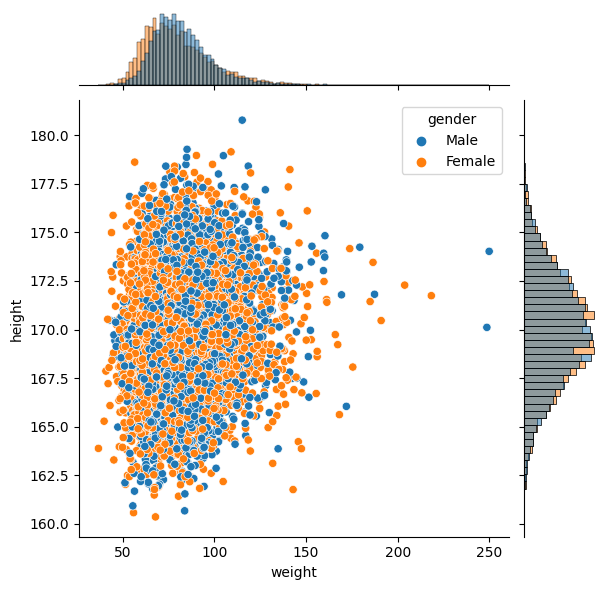

In [19]:
g = sns.JointGrid(data=train_df, x="weight", y="height", hue="gender")
g.plot(sns.scatterplot, sns.histplot)

## Explore the feature "A" 

Text(0.5, 1.0, 'Distribution of the values of the anonymous column A')

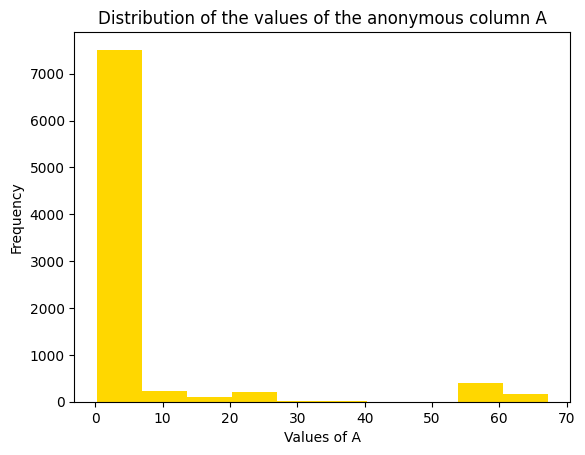

In [20]:
plt.hist(train_df['A'], bins=10, color="gold")
plt.xlabel("Values of A")
plt.ylabel("Frequency")
plt.title("Distribution of the values of the anonymous column A")

## Explore the BMI columns

Text(0.5, 1.0, 'Distribution of the BMI')

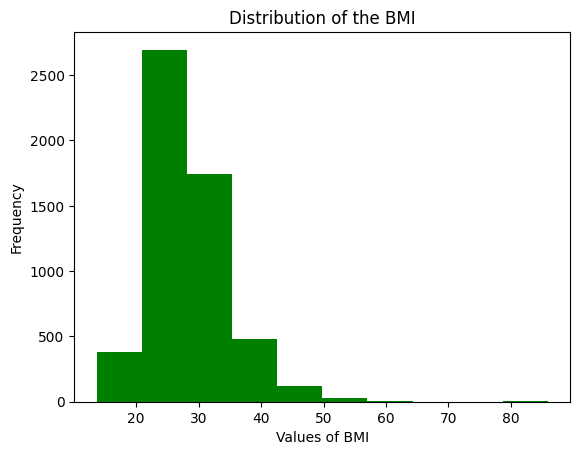

In [21]:
plt.hist(train_df['bmi'], bins=10, color="green")
plt.xlabel("Values of BMI")
plt.ylabel("Frequency")
plt.title("Distribution of the BMI")

## Label distribution

In [22]:
create_pie_chart_per_label(df=train_df, col_name="respiratory_failure", run_name='Label distribution (respiratory failure)')

<b> The exploration will be continued after the pre process stage <b>

# Part B- Pre processing

## Removing outliers

- We decided to remove rows which contain values with z score >3, 
- This will affect the phisycal columns (weight & height & BMI) and the column "A"

In [23]:
def find_remove_ouliers(df):
    find_outliers=df.drop("patient_id", axis=1)
    find_outliers=find_outliers.dropna()
    find_outliers=find_outliers.select_dtypes(include=['float64', 'int64'])
    outliert_index_list=set(find_outliers.index)-set(find_outliers[(np.abs(stats.zscore(find_outliers)) < 3).all(axis=1)].index)
    df_without_outliers=df.drop(outliert_index_list)
        
    return df_without_outliers

train_df = find_remove_ouliers(train_df)

In [24]:
train_df.shape

(8786, 20)

<b> Outlier detection - if some values are > 31 :This is an outlier <b>

In [25]:
train_df["mental_health"].unique()

array(['4.0 Days', '15.0 Days', '2.0 Days', '0.0 Days', '20.0 Days', nan,
       '5.0 Days', 'unknown', '30.0 Days', '3.0 Days', '1.0 Days',
       '10.0 Days', '?'], dtype=object)

In [26]:
train_df["physical_health"].unique()

array(['0', '1', '4', '3', nan, '5', '6', '2', '15', '30', '10', '21',
       '7', '14', '20', '12', '8', 'unknown', '26', '19', '16', '13',
       '11', '28', '18', '27', '25', '?', '23', '17', '29', '9'],
      dtype=object)

(max 31 days in a month) - Check physical_health & mental_health

no values > 31

<b> Sleep time outlier detection - if some values are > 10 :This is an outlier <b>

In [27]:
train_df["sleep_time"].unique()

array(['7.0 Hours', '6.0 Hours', '2.0 Hours', nan, '8.0 Hours',
       '4.0 Hours', '3.0 Hours', '9.0 Hours', '10.0 Hours'], dtype=object)

## Filling null values & mapping to Numeric values 

### Handling the nulls in bmi & height & weight cols (using close formula for calculating bmi):

Train

In [28]:
train_df["calc_bmi"] = round(train_df["weight"] / ((train_df["height"]) / 100) ** 2, 2)

train_df['bmi'] = train_df.apply(
    lambda row: row["calc_bmi"] if not pd.notnull(row['bmi']) and pd.notnull(
        row['weight']) and pd.notnull(
        row['height']) else row['bmi'], axis=1)
train_df = train_df.drop("calc_bmi", 1)

# Heihgt
train_df['height'] = train_df.apply(
    lambda row: round((row['weight'] / row["bmi"]) ** 0.5, 2) if not pd.notnull(row['height']) and pd.notnull(
        row['weight']) and pd.notnull(
        row['bmi']) else row['height'], axis=1)

# Weight
train_df['weight'] = train_df.apply(
    lambda row: round(row["bmi"] * row["height"] ** 2, 2) if not pd.notnull(row['weight']) and pd.notnull(
        row['height']) and pd.notnull(
        row['bmi']) else row['weight'], axis=1)

/tmp/ipykernel_58394/4280286118.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



Test

In [29]:
test_df["calc_bmi"] = round(test_df["weight"] / ((test_df["height"]) / 100) ** 2, 2)

test_df['bmi'] = test_df.apply(
    lambda row: row["calc_bmi"] if not pd.notnull(row['bmi']) and pd.notnull(
        row['weight']) and pd.notnull(
        row['height']) else row['bmi'], axis=1)
test_df = test_df.drop("calc_bmi", 1)

# Heihgt
test_df['height'] = test_df.apply(
    lambda row: round((row['weight'] / row["bmi"]) ** 0.5, 2) if not pd.notnull(row['height']) and pd.notnull(
        row['weight']) and pd.notnull(
        row['bmi']) else row['height'], axis=1)

# Weight
test_df['weight'] = test_df.apply(
    lambda row: round(row["bmi"] * row["height"] ** 2, 2) if not pd.notnull(row['weight']) and pd.notnull(
        row['height']) and pd.notnull(
        row['bmi']) else row['weight'], axis=1)

/tmp/ipykernel_58394/2053715907.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



### Handling the nulls in alcohol col 
Only 6.5% drinking alcohol - We decide to fill all the nulls with 0 for our purpose (most frequent)

In [30]:
train_df["alcohol"] = np.where(train_df["alcohol"] == 'Yes', 1, 0)
test_df["alcohol"] = np.where(test_df["alcohol"] == 'Yes', 1, 0)

### Handling the nulls in sleeping time col  
Most of the pepole slept for 7 hours, so we decided to fill al the nulls with 7 (also median, and ~avg)

In [31]:
train_df['sleep_time'] = train_df['sleep_time'].str.rstrip(' Hours')
train_df["sleep_time"] = train_df.apply(
    lambda row: 7.0 if not pd.notnull(row['sleep_time']) else float(row['sleep_time']), axis=1)
train_df = train_df.astype({'sleep_time': 'int'})



test_df['sleep_time'] = test_df['sleep_time'].str.rstrip(' Hours')
test_df["sleep_time"] = test_df.apply(
    lambda row: 7.0 if not pd.notnull(row['sleep_time']) else float(row['sleep_time']), axis=1)
test_df = test_df.astype({'sleep_time': 'int'})

### Handling the nulls in other condition col (cancer col )
85% of the not null values are "No cancer", so we decided to fill al the nulls with no cancer (most frequent)
we assume that this type of information is very important and if someone have had cancer - he would have written it.

In [32]:
# train_df["other_condition"] = train_df.apply(
#     lambda row: "No cancer" if not pd.notnull(row['other_condition']) else row['other_condition'], axis=1)
# train_df = train_df.astype({'other_condition': 'string'})
train_df["other_condition"] = train_df.apply(
    lambda row: "unkown" if not pd.notnull(row['other_condition']) else row['other_condition'], axis=1)
train_df = train_df.astype({'other_condition': 'string'})


# test_df["other_condition"] = test_df.apply(
#     lambda row: "No cancer" if not pd.notnull(row['other_condition']) else row['other_condition'], axis=1)
# test_df = test_df.astype({'other_condition': 'string'})

test_df["other_condition"] = test_df.apply(
    lambda row: "unkown" if not pd.notnull(row['other_condition']) else row['other_condition'], axis=1)
test_df = test_df.astype({'other_condition': 'string'})

### Handling the nulls in stroke col  
95% of the not null values are "No stroke", so we decided to fill al the nulls with no stroke (most frequent)
we assume that this type of information is very important and if someone have had stroke - he would have writen it.

In [33]:
stroke_mapping = {"Yes": 1, "No": 0, "?": 2, "unknown": 2}

train_df["stroke"] = np.where(train_df["stroke"] == 'Yes', 1, 0)
test_df["stroke"] = np.where(test_df["stroke"] == 'Yes', 1, 0)

### Filling the null values in physical health with 0
We decided to fill this column with the median value (=0)

In [34]:
physical_health_values = train_df.apply(
    lambda row: None if not pd.notnull(row['physical_health']) or row['physical_health'] == "unknown"
                     or row['physical_health'] == "?" else row['physical_health'], axis=1)

median_val = physical_health_values.median()
print(f' the median value in this column is: {median_val}')

 the median value in this column is: 0.0


In [35]:
train_df["physical_health"] = train_df.apply(
    lambda row: median_val if not pd.notnull(row['physical_health']) or row['physical_health'] == "unknown"
                     or row['physical_health'] == "?" else row['physical_health'], axis=1)
train_df = train_df.astype({'physical_health': 'int'})


test_df["physical_health"] = test_df.apply(
    lambda row: median_val if not pd.notnull(row['physical_health']) or row['physical_health'] == "unknown"
                     or row['physical_health'] == "?" else row['physical_health'], axis=1)
test_df = test_df.astype({'physical_health': 'int'})

### Replace unwanted "?" and "unknown" cells

In [36]:
train_df['mental_health'] = train_df['mental_health'].str.rstrip(' Days')
train_df["mental_health"] = train_df.apply(
    lambda row: np.nan if row['mental_health'] == "?" or  row['mental_health'] == None or  row['mental_health'] == "unknown" or not pd.notnull(row['mental_health']) else row['mental_health'], axis=1)
train_df = train_df.astype({'mental_health': 'float'})


test_df['mental_health'] = test_df['mental_health'].str.rstrip(' Days')
test_df["mental_health"] = test_df.apply(
    lambda row: np.nan if row['mental_health'] == "?" or  row['mental_health'] == None or  row['mental_health'] == "unknown" or not pd.notnull(row['mental_health']) else row['mental_health'], axis=1)
test_df = test_df.astype({'mental_health': 'float'})

### Filling the nulls in mental health

We decided to fill this column with the median value (As we saw above, not defined distribution with many values)

In [37]:
mental_median=train_df['mental_health'].median()
print(f'The median value in mental health column is {mental_median}')
      
# FIll       
train_df["mental_health"] = train_df.apply(
    lambda row: mental_median if  not pd.notnull(row['mental_health']) else row['mental_health'], axis=1)
test_df["mental_health"] = test_df.apply(
    lambda row: mental_median if  not pd.notnull(row['mental_health']) else row['mental_health'], axis=1)

The median value in mental health column is 2.0


###  Filling the nulls in bronchial_asthma 

In [38]:
train_df["bronchial_asthma"] = np.where(train_df["bronchial_asthma"] == 'Yes', 1, 0)
test_df["bronchial_asthma"] = np.where(test_df["bronchial_asthma"] == 'Yes', 1, 0)

###  Filling the nulls in col A
We decided to fill this column with the mean value

In [39]:
mean_A = train_df['A'].mean()
print(f'The mean value is {mean_A}')

The mean value is 4.408929048280223


In [40]:
train_df['A'].fillna(mean_A, inplace=True)
test_df['A'].fillna(mean_A, inplace=True)

### Mapping ages to numeric values & dropping age nulls 

- we decided to map the values in the categorial column "age" to the mean value of the category.
- This decision aims to decresae the complexity of the model 
- On the train set - we dropped the null columns 
- On the test set - we decided to fill the nulls with the mean values (beacuse we cant remove rows there)

In [41]:
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 85}

train_df['age'] = train_df['age'].map(age_mapping)
train_df = train_df.astype({'age': 'float'})

test_df['age'] = test_df['age'].map(age_mapping)
test_df = test_df.astype({'age': 'float'})

In [42]:
age_mean = train_df['age'].mean()

In [43]:
train_df.dropna(subset=["age"], inplace=True)

test_df['age'].fillna(age_mean, inplace=True)

###  Filling the nulls in gender col with unkown to maintain the entropy

In [44]:
train_df['gender'].fillna("unknown", inplace=True)
test_df['gender'].fillna("unknown", inplace=True)

### Reducing unique values at col diabetes & fill nuls

In [45]:
train_df['pregnancy'] = np.where(train_df['diabetes'] == 'Yes (during pregnancy)', 1, 0)

train_df['diabetes'] = train_df['diabetes'].replace('Yes (during pregnancy)', 'Yes')
train_df['diabetes'] = train_df['diabetes'].replace('No, borderline diabetes', 'No')


test_df['pregnancy'] = np.where(test_df['diabetes'] == 'Yes (during pregnancy)', 1, 0)

test_df['diabetes'] = test_df['diabetes'].replace('Yes (during pregnancy)', 'Yes')
test_df['diabetes'] = test_df['diabetes'].replace('No, borderline diabetes', 'No')


train_df["diabetes"] = np.where(train_df["diabetes"] == 'Yes', 1, 0)
test_df["diabetes"] = np.where(test_df["diabetes"] == 'Yes', 1, 0)

## Bin mapping and values transformation

In [46]:
bin_mapping = {"Yes": 1, "No": 0}

#train_df["smoker"] = train_df["smoker"].map(bin_mapping)
train_df["walk_difficulty"] = train_df["walk_difficulty"].map(bin_mapping)
train_df["exercise"] = train_df["exercise"].map(bin_mapping)
train_df["respiratory_failure"] = train_df["respiratory_failure"].map(bin_mapping)


#test_df["smoker"] = test_df["smoker"].map(bin_mapping)
test_df["walk_difficulty"] = test_df["walk_difficulty"].map(bin_mapping)
test_df["exercise"] = test_df["exercise"].map(bin_mapping)

## Fill all the missing  in overall health With "unkown", to preserve the information about missingness.

In [47]:
train_df["overall_health"] = train_df.apply(
    lambda row: "unknown" if row['overall_health'] == "?" else row['overall_health'], axis=1)
train_df['overall_health'] = train_df['overall_health'].fillna('unknown')


test_df["overall_health"] = test_df.apply(
    lambda row: "unknown" if row['overall_health'] == "?" else row['overall_health'], axis=1)
test_df['overall_health'] = test_df['overall_health'].fillna('unknown')

## Genreal fills

### Smokers column

- By common sense, we decided that those who are in pregnancy or has an astma, are not smokers
- The rest of the smoker nulls will be filed as unknown

In [48]:
train_df.loc[(train_df["smoker"].isnull()) & ((train_df["pregnancy"] == 1) | (train_df["bronchial_asthma"] == 1)), "smoker"] = "No"
#train_df.dropna(subset=['smoker'], inplace=True)

test_df.loc[(train_df["smoker"].isnull()) & ((test_df["pregnancy"] == 1) | (test_df["bronchial_asthma"] == 1)), "smoker"] = "No"
#test_df.dropna(subset=['smoker'], inplace=True)

train_df['smoker'].fillna("unknown", inplace=True)
test_df['smoker'].fillna("unknown", inplace=True)

### Drop rows with more then 2 nulls


In [49]:
len(train_df)
train_df.dropna(thresh=train_df.shape[1] - 1, inplace=True)
len(train_df)

8287

## Define functions to use models to fill nulls:

### Func: find best params for logistic regression

In [50]:
def find_best_hyper_lr(X, y):
    trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
    powers = range(-10, 3)
    Cs = [10 ** p for p in powers]
    
    lr_parameters = {'penalty':['l1', 'l2'],
                 'C': Cs,
                 'tol':[0.1,0.01,0.001,0.0001,0.00001],
                 'max_iter': [100],
                 'random_state' :[0],
                 'solver' : ["liblinear"]}
    
    lr_gs = GridSearchCV(LogisticRegression(), lr_parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    lr_gs.fit(trainx,trainy)
        
    best_params = lr_gs.best_params_
    best_score = lr_gs.best_score_
    best_model = lr_gs.best_estimator_

    test_probs = best_model.predict_proba(testx)
    test_preds = test_probs[:, 1]
    test_score = roc_auc_score(testy, test_preds)

    return best_params, best_score, test_score, best_model

initial function, was not used:

In [51]:
powers = range(-10, 0)
# C is the inverse value for the lambda parameter we saw in class for regularization strength
Cs = [10 ** p for p in powers]

def find_best_c(trainx, trainy, testx, testy, method="auc"):
    best_acc = 0
    best_c = 0
    clf = 0
    for c in Cs:
        log = LogisticRegression(penalty="l2", C=c, solver='liblinear', tol=0.0001, max_iter=100)
        log.fit(trainx, trainy)
        probs = log.predict_proba(testx)
        preds = probs[:, 1]
        fpr, tpr, _ = roc_curve(testy, preds)
        roc_auc = auc(fpr, tpr)
        acc = log.score(testx, testy)
        if method == "accuracy":
            if acc > best_acc:
                best_acc = acc
                best_c = c
                clf = log
        else:
            if roc_auc > best_acc:
                best_acc = roc_auc
                best_c = c
                clf = log
    return best_c, best_acc, clf

### func: Find best k for knn

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

def find_best_hyper_knn(X, y):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42) 
    knn_parameters = {
        'n_neighbors': [3, 5, 7, 10, 12, 15, 17, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
    
    knn_gs = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    knn_gs.fit(train_x, train_y)
        
    best_params_knn = knn_gs.best_params_
    best_score_knn = knn_gs.best_score_
    best_model_knn = knn_gs.best_estimator_

    test_probs_knn = best_model_knn.predict_proba(test_x)
    test_preds_knn = test_probs_knn[:, 1]
    test_score_knn = roc_auc_score(test_y, test_preds_knn)

    return best_params_knn, best_score_knn, test_score_knn, best_model_knn

initial function, was not used:

In [53]:
def find_best_k(trainx, trainy, testx, testy, method="auc"):
    best_auc = 0
    best_k = 0
    best_acc = 0
    clf = 0
    sqr_n = round((len(trainx))**0.5)
    for k in range(5, 25):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(trainx, trainy)
        probs = knn.predict_proba(testx)
        preds = probs[:, 1]
        fpr, tpr, _ = roc_curve(testy, preds)
        roc_auc = auc(fpr, tpr)
        acc = knn.score(testx, testy)
        if method == "accuracy":
            if acc > best_acc:
                best_auc = acc
                best_k = k
                clf = knn
        else:
            if roc_auc > best_auc:
                best_auc = roc_auc
                best_k = k
                clf = knn
    for k in range(sqr_n-10, sqr_n+10):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(trainx, trainy)
        probs = knn.predict_proba(testx)
        preds = probs[:, 1]
        fpr, tpr, _ = roc_curve(testy, preds)
        roc_auc = auc(fpr, tpr)
        acc = knn.score(testx, testy)
        if method == "accuracy":
            if acc > best_acc:
                best_auc = acc
                best_k = k
                clf = knn
        else:
            if roc_auc > best_auc:
                best_auc = roc_auc
                best_k = k
                clf = knn
    return best_k, best_auc, clf

### Func: finding best hyper parameters for RF

In [54]:
def find_best_hyper_rf(trainx, trainy, testx, testy, method="auc"):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestClassifier()
    if method == "auc":
        scoring = "roc_auc"
    else:
        scoring = method

    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=scoring)
    grid_search.fit(trainx, trainy)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_

    if method == "accuracy":
        test_score = best_model.score(testx, testy)
    else:
        test_probs = best_model.predict_proba(testx)
        test_preds = test_probs[:, 1]
        test_score = roc_auc_score(testy, test_preds)

    return best_params, best_score, test_score, best_model

### Func: find parameters for catboost

In [55]:
def find_best_hyper_catboost(X,y):
    trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42) 
    param_grid = {
        'iterations': [50, 100, 200],
        'depth': [5, 10],
        'learning_rate': [0.01, 0.1, 0.5],
        'l2_leaf_reg': [1, 3, 5]
    }

    catboost = CatBoostClassifier(verbose=False)
    grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring="roc_auc")
    grid_search.fit(trainx, trainy)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_

    test_probs = best_model.predict_proba(testx)
    test_preds = test_probs[:, 1]
    test_score = roc_auc_score(testy, test_preds)

    return best_params, best_score, test_score, best_model

### Func: create dummie cols

In [56]:
def dummies(df,col):
    if type(col) == list:
        for c in col:
            dumm = pd.get_dummies(df[c], prefix=c)
            df = pd.concat([df,dumm],axis=1)
            df = df.drop(c,1)
    else: # type == str (one col)
        dumm = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df,dumm],axis=1)
        df = df.drop(col,1)
        
    return df

### Func: splitting to train+test and compering models

initial function, was not used:

In [57]:
def split_and_find_param(df, col_name, method):
    new_df = df[pd.notnull(df[col_name])]
    X = new_df[new_df.columns.difference([col_name])]
    y = new_df[col_name]
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
    k, acc1, knn = find_best_k(train_x, train_y, test_x, test_y,method)
    c, acc2, log = find_best_c(train_x, train_y, test_x, test_y,method)
    if acc2 > acc1 :
        return c, method,acc2, log
    else:
        return k,method, acc1, knn

## Scaling

The given dataset in our project is not normalized. 

Data normalization is crucial as it ensures that all features are on a common scale or range. When data is not normalized, features may have different scales, units, or ranges. 

This can result in biased predictions, suboptimal model performance, and difficulties in comparing and interpreting features. By normalizing the data, we eliminate these issues and enable fair and accurate analysis.

Therefor, making it essential to perform scaling in the project. Here we do so:

In [58]:
scalernorma = StandardScaler()
minmaxscaler = MinMaxScaler()

min_max_cols = ["weight", "height", "bmi", "A", "sleep_time", "mental_health", "physical_health"]
scaler = MinMaxScaler().fit(train_df[min_max_cols])
train_df[min_max_cols] = scaler.transform(train_df[min_max_cols])
test_df[min_max_cols] = scaler.transform(test_df[min_max_cols])


# train_df['weight'] = minmaxscaler.fit_transform(train_df[['weight']])
# train_df['height'] = minmaxscaler.fit_transform(train_df[['height']])
# train_df['bmi'] = minmaxscaler.fit_transform(train_df[['bmi']])
# train_df['A'] = minmaxscaler.fit_transform(train_df[['A']])
# train_df['mental_health'] = minmaxscaler.fit_transform(train_df[['mental_health']])
# train_df['sleep_time'] = minmaxscaler.fit_transform(train_df[['sleep_time']])
# train_df['physical_health'] = minmaxscaler.fit_transform(train_df[['physical_health']])
train_df['age'] = train_df["age"]/100


# test_df['weight'] = minmaxscaler.fit(train_df[['weight']]).transform(test_df[['weight']])
# test_df['height'] = minmaxscaler.fit(train_df[['height']]).transform(test_df[['height']])
# test_df['bmi'] = minmaxscaler.fit(train_df[['bmi']]).transform(test_df[['bmi']])
# test_df['A'] = minmaxscaler.fit(train_df[['A']]).transform(test_df[['A']])
# test_df['mental_health'] = minmaxscaler.fit(train_df[['mental_health']]).transform(test_df[['mental_health']])
# test_df['physical_health'] = minmaxscaler.fit(train_df[['physical_health']]).transform(test_df[['physical_health']])
# test_df['sleep_time'] = minmaxscaler.fit(train_df[['sleep_time']]).transform(test_df[['sleep_time']])
test_df['age'] = test_df["age"]/100

In [59]:
cols_to_dumm = ["overall_health", "gender", 'other_condition', "smoker"]

## FIll NULLS USING MODELS

- <b> Important !<b>
- During this project we were working in an agile way.
- WE tried to predict more columns using models but it only worked with these two models presented here.
- The code was the same (!) and included dropping nulls, setting the column name to the specific and try to train a model to predict the nulls in a requiered column.

In [60]:
train_df.set_index('patient_id', inplace=True)
test_df["patient_id"] = [x+10000 for x in range(len(test_df))]
test_df.set_index('patient_id', inplace=True)

### Walk difficulty col

In [61]:
train_df2 = train_df.dropna()
train_df2 = train_df2.drop('respiratory_failure',1)
train_df2 = train_df2.drop('exercise', 1)

train_df2 = dummies(train_df2, cols_to_dumm)

col_name = "walk_difficulty"
new_df = train_df2[pd.notnull(train_df2[col_name])]
X = new_df[new_df.columns.difference([col_name])]
y = new_df[col_name]

#best_params_lr, best_score_lr, test_score_lr, best_model_lr = find_best_hyper_knn(X, y)
#best_params_lr, best_score_lr, test_score_lr, best_model_lr = find_best_hyper_catboost(X,y)

best_params_lr, best_score_lr, test_score_lr, best_model_lr = find_best_hyper_lr(X, y)

print("*****Logistic regression results*****")
print(f'The best parmas are: {best_params_lr}')
print(f'The best auc score on the train set is: {best_score_lr}')
print(f'The best auc score on the test set is: {test_score_lr}')

/tmp/ipykernel_58394/3093469069.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/3093469069.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'lab

*****Logistic regression results*****
The best parmas are: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.001}
The best auc score on the train set is: 0.8847582508690607
The best auc score on the test set is: 0.8867249602543721


In [62]:
walk_df = train_df.copy()
walk_df = walk_df.drop('respiratory_failure',1)
walk_df = pd.concat([walk_df, test_df], axis=0)
walk_df = walk_df.drop('exercise', 1)

walk_df = dummies(walk_df, cols_to_dumm)

train_df_null = walk_df[walk_df['walk_difficulty'].isnull()]
walk_df = walk_df.dropna()

X_train = walk_df.drop('walk_difficulty', axis=1)
y_train = walk_df['walk_difficulty']


# Train 
logreg = LogisticRegression(**best_params_lr)
logreg.fit(X_train, y_train)

# Predict missing values
X_null = train_df_null.drop('walk_difficulty', axis=1)

imputed_values = logreg.predict(X_null)

# Fill
train_df_null['walk_difficulty'] = imputed_values

train_df["walk_difficulty"] = train_df.apply(
    lambda row: train_df_null.loc[row.name, 'walk_difficulty'] 
    if not pd.notnull(row['walk_difficulty']) else row['walk_difficulty'], axis=1)

test_df["walk_difficulty"] = test_df.apply(
    lambda row: train_df_null.loc[row.name, 'walk_difficulty'] 
    if not pd.notnull(row['walk_difficulty']) else row['walk_difficulty'], axis=1)

train_df = train_df.astype({'walk_difficulty': 'int'})

test_df = test_df.astype({'walk_difficulty': 'int'})

/tmp/ipykernel_58394/4044139324.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/4044139324.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'lab

###  Exercise col

Checking for the best simple model to predict the null vals in exercise

In [63]:
train_df1 = train_df.dropna()
train_df1 = train_df1.drop(['respiratory_failure'],1)

train_df1 = dummies(train_df1, cols_to_dumm)

col_name = "exercise"
new_df = train_df1[pd.notnull(train_df1[col_name])]
X = new_df[new_df.columns.difference([col_name])]
y = new_df[col_name]

#best_params_lr, best_score_lr, test_score_lr, best_model_lr = find_best_hyper_knn(X, y)
#best_params_lr, best_score_lr, test_score_lr, best_model_lr = find_best_hyper_catboost(X,y)

best_params_lr, best_score_lr, test_score_lr, best_model_lr = find_best_hyper_lr(X, y)

print("*****Logistic regression results*****")
print(f'The best parmas are: {best_params_lr}')
print(f'The best auc score on the train set is: {best_score_lr}')
print(f'The best auc score on the test set is: {test_score_lr}')

/tmp/ipykernel_58394/3609345106.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



*****Logistic regression results*****
The best parmas are: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 1e-05}
The best auc score on the train set is: 0.7390891225792228
The best auc score on the test set is: 0.7443732585063381


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [64]:
exercise_df = train_df.copy()
exercise_df = exercise_df.drop(['respiratory_failure'],1)
exercise_df_length = len(exercise_df)

exercise_df = pd.concat([exercise_df, test_df], axis=0)

cols_to_dumm = ["overall_health", "gender", 'other_condition', "smoker"]

exercise_df = dummies(exercise_df, cols_to_dumm)

train_df_null = exercise_df[exercise_df['exercise'].isnull()]
exercise_df = exercise_df.dropna()

X_train = exercise_df.drop('exercise', axis=1)
y_train = exercise_df['exercise']

# Train
logreg = LogisticRegression(**best_params_lr)
logreg.fit(X_train, y_train)

# Predict missing values
X_null = train_df_null.drop('exercise', axis=1)
imputed_values = logreg.predict(X_null)


# Fill the null values with the predicted values
train_df_null['exercise'] = imputed_values

# Apply
train_df["exercise"] = train_df.apply(
    lambda row: train_df_null.loc[row.name, 'exercise'] 
    if not pd.notnull(row['exercise']) else row['exercise'], axis=1)

test_df["exercise"] = test_df.apply(
    lambda row: train_df_null.loc[row.name, 'exercise'] 
    if not pd.notnull(row['exercise']) else row['exercise'], axis=1)

train_df['exercise'] = train_df['exercise'].astype(int)
test_df['exercise'] = test_df['exercise'].astype(int)

/tmp/ipykernel_58394/2599983172.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## All Nulls are filled ?

In [65]:
check_nulls(train_df)
print(train_df.shape)
print("*****************************************************************")
check_nulls(test_df)
print(test_df.shape)

the amount of nulls in bmi 0
the amount of nulls in smoker 0
the amount of nulls in alcohol 0
the amount of nulls in stroke 0
the amount of nulls in physical_health 0
the amount of nulls in mental_health 0
the amount of nulls in walk_difficulty 0
the amount of nulls in gender 0
the amount of nulls in age 0
the amount of nulls in diabetes 0
the amount of nulls in exercise 0
the amount of nulls in overall_health 0
the amount of nulls in sleep_time 0
the amount of nulls in bronchial_asthma 0
the amount of nulls in A 0
the amount of nulls in other_condition 0
the amount of nulls in height 0
the amount of nulls in weight 0
the amount of nulls in respiratory_failure 0
the amount of nulls in pregnancy 0
(8287, 20)
*****************************************************************
the amount of nulls in bmi 2
the amount of nulls in smoker 0
the amount of nulls in alcohol 0
the amount of nulls in stroke 0
the amount of nulls in physical_health 0
the amount of nulls in mental_health 0
the amount 

- We can see above that there are rows that contain more that 2 nulls (which we dropped in the train df) but couldnt be droppde in the test df,

- We decided to fill the nulls with the mean values of the columns

In [66]:
mean_bmi = train_df["bmi"].mean()
mean_height = train_df["height"].mean()
mean_weight = train_df["weight"].mean()

test_df['bmi'].fillna(mean_bmi, inplace=True)
test_df['height'].fillna(mean_height, inplace=True)
test_df['weight'].fillna(mean_weight, inplace=True)

## make Overall health a numeric column

- instead of using the "get dummies" function, we decided (by Trial and error) to use bin mapping for the overall health column. It helps us to decrease the dimention of the model before using PCA

In [67]:
overall_health_mapping = {
    'Excellent': 5,
    'Very good': 4,
    'unknown': 3.5,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
    }


train_df["overall_health"] = train_df["overall_health"].map(overall_health_mapping)
test_df["overall_health"] = test_df["overall_health"].map(overall_health_mapping)


## Scaling
train_df['overall_health'] = train_df["overall_health"]/5
test_df['overall_health'] = test_df["overall_health"]/5

In [68]:
unique_values = train_df.apply(lambda x: x.unique())
print(unique_values)

bmi                    [0.19215849265724577, 0.17871986699916875, 0.1...
smoker                                                [No, Yes, unknown]
alcohol                                                           [0, 1]
stroke                                                            [0, 1]
physical_health        [0.0, 0.03333333333333333, 0.13333333333333333...
mental_health          [0.13333333333333333, 0.5, 0.06666666666666667...
walk_difficulty                                                   [0, 1]
gender                                           [Male, Female, unknown]
age                    [0.47, 0.57, 0.37, 0.62, 0.72, 0.67, 0.27, 0.4...
diabetes                                                          [0, 1]
exercise                                                          [1, 0]
overall_health                            [0.8, 0.6, 0.7, 0.4, 1.0, 0.2]
sleep_time              [0.625, 0.5, 0.0, 0.75, 0.25, 0.125, 0.875, 1.0]
bronchial_asthma                                   

 ## Continue Exploration

<b> After all nulls are filled and the values are mapped - explore the final data <b>

In [69]:
train_df.shape

(8287, 20)

In [70]:
train_df.describe()

bmi      alcohol       stroke  physical_health  mental_health  \
count  8287.000000  8287.000000  8287.000000      8287.000000    8287.000000   
mean      0.200388     0.065042     0.044286         0.110028       0.097172   
std       0.083907     0.246614     0.205743         0.266467       0.145427   
min       0.000000     0.000000     0.000000         0.000000       0.000000   
25%       0.142699     0.000000     0.000000         0.000000       0.066667   
50%       0.188141     0.000000     0.000000         0.000000       0.066667   
75%       0.243696     0.000000     0.000000         0.033333       0.066667   
max       1.000000     1.000000     1.000000         1.000000       1.000000   

       walk_difficulty          age     diabetes     exercise  overall_health  \
count      8287.000000  8287.000000  8287.000000  8287.000000     8287.000000   
mean          0.142754     0.574955     0.131893     0.793894        0.716134   
std           0.349843     0.178945     0.338395     0.404532        0.200943   
min           0.000000     0.210000     0.000000     0.000000        0.200000   
25%           0.000000     0.420000     0.000000     1.000000        0.600000   
50%           0.000000     0.620000     0.000000     1.000000        0.800000   
75%           0.000000     0.720000     0.000000     1.000000        0.800000   
max           1.000000     0.850000     1.000000     1.000000        1.000000   

        sleep_time  bronchial_asthma            A       height       weight  \
count  8287.000000       8287.000000  8287.000000  8287.000000  8287.000000   
mean      0.575902          0.126584     0.060926     0.939485     0.000173   
std       0.150255          0.332526     0.180573     0.018886     0.010984   
min       0.000000          0.000000     0.000000     0.000000     0.000000   
25%       0.500000          0.000000     0.004386     0.929029     0.000038   
50%       0.625000          0.000000     0.008820     0.939441     0.000050   
75%       0.625000          0.000000     0.013148     0.950229     0.000064   
max       1.000000          1.000000     1.000000     1.000000     1.000000   

       respiratory_failure    pregnancy  
count          8287.000000  8287.000000  
mean              0.149632     0.006999  
std               0.356732     0.083371  
min               0.000000     0.000000  
25%               0.000000     0.000000  
50%               0.000000     0.000000  
75%               0.000000     0.000000  
max               1.000000     1.000000

- <b> Scatter plot for every feature <b>
- y axis = respiratory failure values
- x axis = feature values

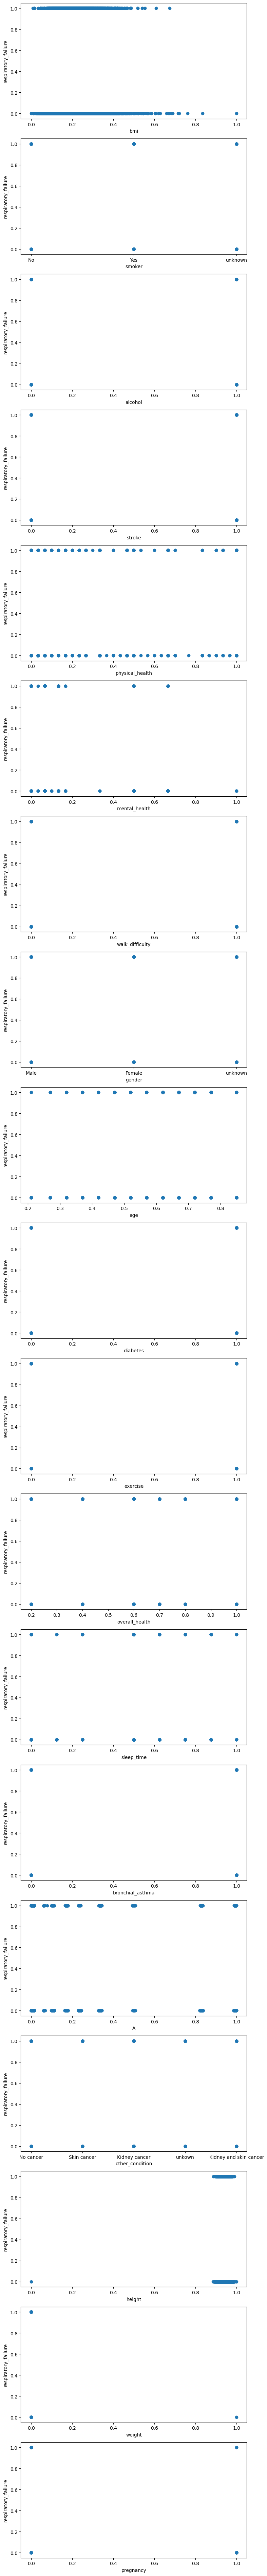

In [71]:
feature_columns = train_df.columns.tolist()
feature_columns.remove('respiratory_failure')

fig, axs = plt.subplots(nrows=len(feature_columns), figsize=(8, 4 * len(feature_columns)))
for i, feature in enumerate(feature_columns):
    axs[i].scatter(train_df[feature], train_df['respiratory_failure'])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('respiratory_failure')

plt.tight_layout()
plt.show()

- We were trying yo investigate any "special" connections between the featues and the label,
- An example for something we understood is that people with hight values in "mental_health" column DO NOT have respiratory_failure

- <b> Box plot for every numeric feature - correlation to target <b>
- x axis = respiratory failure values (0 or 1)
- y axis = feature distribution

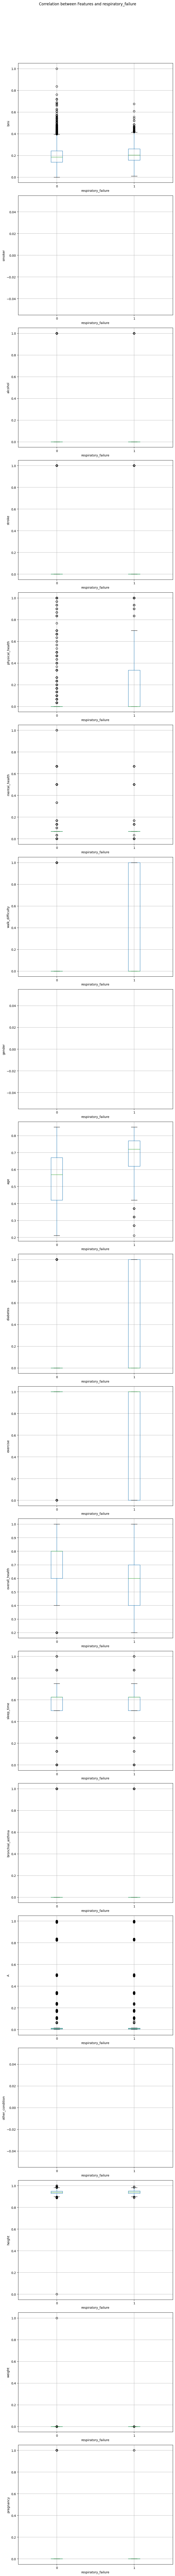

In [72]:
plot_df = train_df.copy()
plot_df[feature_columns] = plot_df[feature_columns].apply(pd.to_numeric, errors='coerce')
plot_df['respiratory_failure'] = pd.to_numeric(plot_df['respiratory_failure'], errors='coerce')


fig, axs = plt.subplots(nrows=len(feature_columns), figsize=(8, 6 * len(feature_columns)))
for i, feature in enumerate(feature_columns):
    plot_df.boxplot(column=feature, by='respiratory_failure', ax=axs[i])
    axs[i].set_xlabel('respiratory_failure')
    axs[i].set_ylabel(feature)
    axs[i].set_title('')

plt.suptitle('Correlation between Features and respiratory_failure', y=1.02)
plt.tight_layout()
plt.show()

- We were trying yo investigate any "special" correlations between the featues and the label,
- An example for something we understood seeing the differece in the boxplots og with hight values in "physical_health" column- the boxplots behave differently and it suggests that this feature will be useful for the model.

## correlation matrix

/tmp/ipykernel_58394/2580668382.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



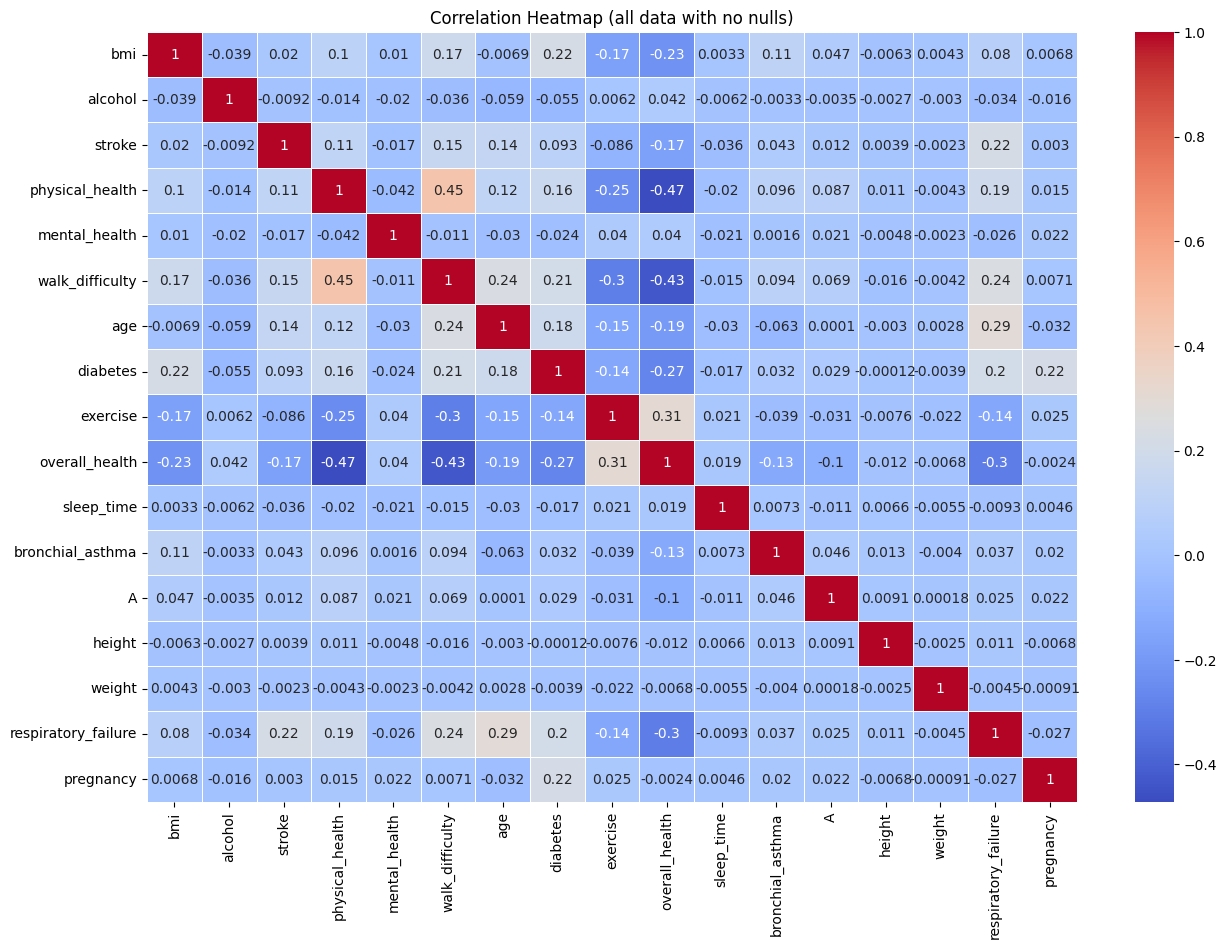

In [73]:
corr_matrix = train_df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)

ax.set_title("Correlation Heatmap (all data with no nulls)")
plt.show()

In [74]:
columns_to_dummies = ["gender", "other_condition", "smoker"]
train_df = dummies(train_df ,columns_to_dummies)
test_df = dummies(test_df ,columns_to_dummies)


# We can easily romove one of the columns with out losing ant information.
train_df.loc[train_df['other_condition_Kidney and skin cancer'] == 1, 'other_condition_Kidney cancer'] = 1
train_df.loc[train_df['other_condition_Kidney and skin cancer'] == 1, 'other_condition_Skin cancer'] = 1
train_df.drop('other_condition_Kidney and skin cancer', axis=1, inplace=True)

test_df.loc[test_df['other_condition_Kidney and skin cancer'] == 1, 'other_condition_Kidney cancer'] = 1
test_df.loc[test_df['other_condition_Kidney and skin cancer'] == 1, 'other_condition_Skin cancer'] = 1
test_df.drop('other_condition_Kidney and skin cancer', axis=1, inplace=True)

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/tmp/ipykernel_58394/117090570.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'label

## Dimentions reduction (Feature selection using PCA)

- Having too many dimensions (in this case, many features) leads to challenges such as overfitting, decreased generalization performance, difficulties in interpretation and visualization. 

- With an increased number of dimensions, the amount of data required for effective training grows exponentially. This sparsity can hinder the model's ability to generalize well. Moreover, high dimensionality makes it harder to determine the true impact of each feature and increases computational complexity. 

- Feature selection or dimensionality reduction techniques are crucial to mitigate these problems and improve the model's performance.
- Therefor, we chose to use the Feature selection methos As writter below to decrease the number of features we will use. 

In [75]:
target_col_name = "respiratory_failure"

X = train_df.drop(target_col_name, axis=1)
y = train_df[target_col_name] 

### Regular PCA - Not a part of the final work flow

<b> We tried using regular PCA but found out it yield a smaller auc (~ by 5%) <b>

In [76]:
def create_pca(n_components, df):
    pca = PCA(n_components)
    new_df = pca.fit_transform(df)
    explained_variance_ratio=pca.explained_variance_ratio_.cumsum()
    new_df = pd.DataFrame(new_df)
    return new_df, explained_variance_ratio

In [77]:
new_df, explained_variance_ratio = create_pca(n_components=X.shape[1], df=X)

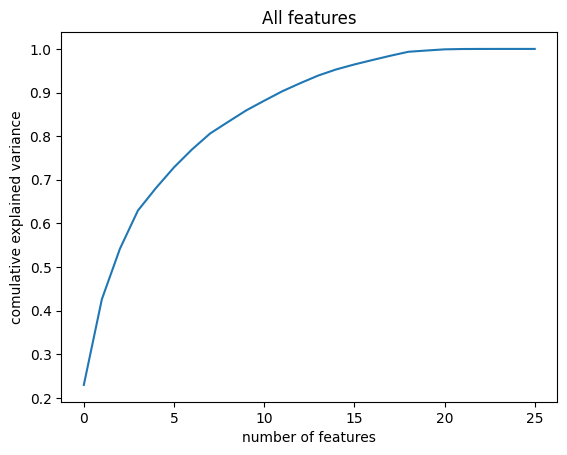

In [78]:
plt.plot(explained_variance_ratio, '-')
plt.xlabel('number of features')
plt.ylabel('comulative explained variance')
plt.title('All features')
plt.show()

In [79]:
# set the n_component value to be the number of compenent that expline 95% of the data:
n_components=np.argmax(explained_variance_ratio>0.95)+1
print(f'number of components: {n_components}')
# reduce train data by PCA:
train_after_PCA, explained_variance_ratio = create_pca(n_components=n_components, df=X)
train_after_PCA

number of components: 15


0         1         2         3         4         5         6   \
0    -0.001706 -0.978771 -0.142328  0.117020  0.521522  0.725986  0.205263   
1    -0.907935  0.063954  0.759627 -0.831329 -0.145965 -0.024570 -0.078226   
2     0.015295  0.927008 -0.582535 -0.259617 -0.038775 -0.075743 -0.025692   
3    -0.969420 -0.024692 -0.309605 -0.045324 -0.025215 -0.080064 -0.066061   
4     0.015957  0.927615 -0.578856 -0.255794 -0.036867 -0.077058 -0.023415   
...        ...       ...       ...       ...       ...       ...       ...   
8282  1.130760  0.244242  0.904545 -0.170460  0.327739 -0.131681 -0.816386   
8283 -0.018364  0.959818 -0.522224 -0.173297  0.510290  0.693351  0.270505   
8284  0.050759 -0.946267 -0.057545  0.197726  0.111038 -0.046004 -0.270671   
8285  0.012049  0.916811 -0.607843 -0.263175 -0.039579 -0.055962 -0.021023   
8286  0.022324 -1.023115 -0.230665  0.027680 -0.022498 -0.021028 -0.082086   

            7         8         9         10        11        12        13  \
0    -0.019203  0.063103 -0.076837  0.017453 -0.081923 -0.005289 -0.016853   
1    -0.480032 -0.016518 -0.047523 -0.102960 -0.006942 -0.143056  0.052392   
2    -0.040298 -0.083284 -0.111285 -0.034276 -0.026648  0.007782 -0.020946   
3    -0.017120 -0.062139 -0.040059 -0.071685  0.039927 -0.009275 -0.018782   
4    -0.039922 -0.082780 -0.110514 -0.033201 -0.024730  0.010254 -0.017560   
...        ...       ...       ...       ...       ...       ...       ...   
8282  1.007460 -0.112961 -0.062678 -0.157688  0.179866 -0.328325  0.064827   
8283 -0.027968  0.044652 -0.132274  0.020567 -0.091679 -0.018555 -0.043489   
8284  0.058606  0.006254 -0.024430 -0.246935  0.454394 -0.125497  0.007213   
8285 -0.019443 -0.079505 -0.100719 -0.043592 -0.013560 -0.011043 -0.045372   
8286  0.003425 -0.057682 -0.050778 -0.040223 -0.014733  0.006736 -0.030425   

            14  
0    -0.063095  
1     0.014747  
2    -0.040479  
3    -0.033892  
4    -0.029718  
...        ...  
8282 -0.239489  
8283 -0.029321  
8284  0.862456  
8285 -0.031882  
8286 -0.025530  

[8287 rows x 15 columns]

- modeling with this feature set (the "train_after_PCA" data) is in section 4.5

### Feature selection using PCA

Finally, we implemented a feature selection method which checks for each component the 4 most significant features for it (during the PCA) and finally takes only features that are among the 4 most important for any feature.

Cumulative Variances (Percentage):
[22.95689611 42.59918908 54.16089692 62.94796893 68.10624905 72.84671098
 76.96206425 80.60325103 83.27096712 85.89459363 88.12131847 90.28493713
 92.14849383 93.90224141 95.30962479]
Number of components: 15


Text(0, 0.5, 'Explained variance (%)')

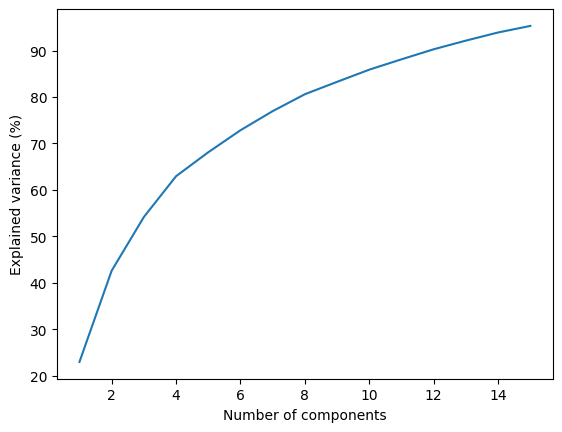

In [80]:
pca = PCA(n_components = 0.95)
pca.fit(X)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [81]:
print('Top 4 most important features in each component')
print('===============================================')
pca_components=abs(pca.components_)
comp_lst = []
for row in range(pca_components.shape[0]-1):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    for i in X.columns[indices].to_list():
        comp_lst.append(i)
    print(f'Component {row}: {X.columns[indices].to_list()}')
    
comp_lst=list(dict.fromkeys(comp_lst))

Top 4 most important features in each component
Component 0: ['gender_Female', 'gender_Male', 'smoker_No', 'smoker_Yes']
Component 1: ['gender_Male', 'gender_Female', 'smoker_No', 'smoker_Yes']
Component 2: ['other_condition_No cancer', 'other_condition_Skin cancer', 'walk_difficulty', 'exercise']
Component 3: ['exercise', 'other_condition_No cancer', 'walk_difficulty', 'other_condition_Skin cancer']
Component 4: ['exercise', 'bronchial_asthma', 'diabetes', 'walk_difficulty']
Component 5: ['bronchial_asthma', 'diabetes', 'exercise', 'age']
Component 6: ['diabetes', 'walk_difficulty', 'bronchial_asthma', 'physical_health']
Component 7: ['other_condition_unkown', 'other_condition_Skin cancer', 'other_condition_No cancer', 'age']
Component 8: ['smoker_unknown', 'smoker_Yes', 'smoker_No', 'bronchial_asthma']
Component 9: ['alcohol', 'diabetes', 'physical_health', 'gender_unknown']
Component 10: ['gender_unknown', 'gender_Female', 'gender_Male', 'physical_health']
Component 11: ['physical_h

In [82]:
print("Over all the PCA anlyze yield",len(comp_lst),"that we should use in our model")
comp_lst

Over all the PCA anlyze yield 19 that we should use in our model


['gender_Female',
 'gender_Male',
 'smoker_No',
 'smoker_Yes',
 'other_condition_No cancer',
 'other_condition_Skin cancer',
 'walk_difficulty',
 'exercise',
 'bronchial_asthma',
 'diabetes',
 'age',
 'physical_health',
 'other_condition_unkown',
 'smoker_unknown',
 'alcohol',
 'gender_unknown',
 'overall_health',
 'other_condition_Kidney cancer',
 'stroke']

 - Does the 3 best components of the PCA features are expressing the difference between the group (respiratory failure & no respiratory failure) ??

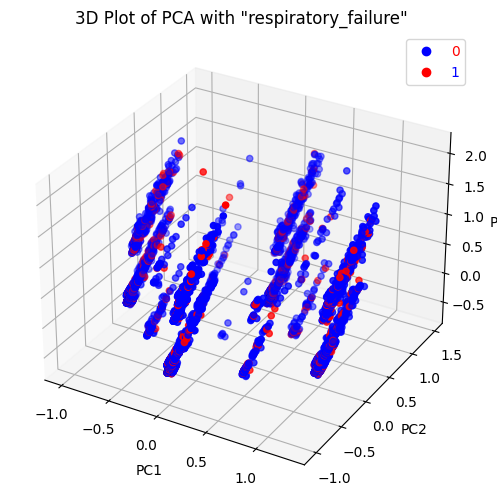

In [83]:
features = X[comp_lst]

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Create a new DataFrame with the PCA results
pca_df2 = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the "respiratory_failure" column to the PCA DataFrame
pca_df2['respiratory_failure'] = train_df['respiratory_failure']

# Create a figure and a 3D plot
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D visualization
scatter = ax.scatter(pca_df2['PC1'], pca_df2['PC2'], pca_df2['PC3'], c=pca_df2['respiratory_failure'], cmap='bwr')

colors = ['red', 'blue']
labels = ['0', '1']
legend = ax.legend(handles=scatter.legend_elements()[0], labels=labels, loc='upper right')
for i, text in enumerate(legend.get_texts()):
    text.set_color(colors[i])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Plot of PCA with "respiratory_failure"')

plt.show()

# Part C - Modeling

<b> Final praperations and splitting <b>

In [84]:
X = train_df[comp_lst]
y = train_df["respiratory_failure"]
models =[]

## Model number 1: Logistic Regression

In [85]:
def find_best_hyper_lr(X, y):
    trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
    powers = range(-10, 3)
    Cs = [10 ** p for p in powers]
    lr_parameters = {'penalty':['l1', 'l2'],
                 'C': Cs,
                 'tol':[0.1,0.01,0.001,0.0001,0.00001],
                 'max_iter': [100],
                 'random_state' :[0],
                 'solver' : ["liblinear"]}
    
    lr_gs = GridSearchCV(LogisticRegression(), lr_parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    lr_gs.fit(trainx,trainy)
        
    best_params = lr_gs.best_params_
    best_score = lr_gs.best_score_
    best_model = lr_gs.best_estimator_

    test_probs = best_model.predict_proba(testx)
    test_preds = test_probs[:, 1]
    test_score = roc_auc_score(testy, test_preds)

    return best_params, best_score, test_score, best_model

best_params_lr, best_score_lr, test_score_lr, best_model_lr = find_best_hyper_lr(X, y)
models.append(best_model_lr)

In [86]:
print("*****Logistic regression results*****")
print(f'The best parmas are: {best_params_lr}')
print(f'The best auc score on the train set is: {best_score_lr}')
print(f'The best auc score on the test set is: {test_score_lr}')

*****Logistic regression results*****
The best parmas are: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001}
The best auc score on the train set is: 0.8403300680355429
The best auc score on the test set is: 0.8543334282068584


## Model number 3 - Decision Tree 

In [87]:
def find_best_hyper_dt(X, y):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
    max_depths = [None, 5, 10]
    min_samples_splits = [2, 5, 10]
    min_samples_leafs = [1, 2, 4]
    
    dt_parameters = {
        'max_depth': max_depths,
        'min_samples_split': min_samples_splits,
        'min_samples_leaf': min_samples_leafs}

    dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    dt_gs.fit(train_X, train_y)

    best_params = dt_gs.best_params_
    best_score = dt_gs.best_score_
    best_model = dt_gs.best_estimator_

    test_probs = best_model.predict_proba(test_X)
    test_preds = test_probs[:, 1]
    test_score = roc_auc_score(test_y, test_preds)

    return best_params, best_score, test_score, best_model

best_params_dt, best_score_dt, test_score_dt, best_model_dt = find_best_hyper_dt(X, y)
models.append(best_model_dt)

In [88]:
print("*****Decision Tree results*****")
print(f'The best parmas are: {best_params_dt}')
print(f'The best auc score on the train set is: {best_score_dt}')
print(f'The best auc score on the test set is: {test_score_dt}')

*****Decision Tree results*****
The best parmas are: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
The best auc score on the train set is: 0.8126061550919379
The best auc score on the test set is: 0.8077867712194233


## Model number 2: Catboost (Kind of Adaptive Boosting)

In [89]:
def find_best_hyper_catboost(X, y):
    trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'iterations': [50, 100, 200],
        'depth': [5, 10],
        'learning_rate': [0.01, 0.1, 0.5],
        'l2_leaf_reg': [1, 3, 5]}
    
    catboost = CatBoostClassifier(verbose=False)
    grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
    grid_search.fit(trainx, trainy)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_

    test_probs = best_model.predict_proba(testx)
    test_preds = test_probs[:, 1]
    test_score = roc_auc_score(testy, test_preds)

    return best_params, best_score, test_score, best_model

best_params_cb, best_score_cb, test_score_cb, best_model_cb = find_best_hyper_catboost(X, y)
models.append(best_model_cb)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [90]:
print("*****Cat boost results*****")
print(f'The best parmas are: {best_params_cb}')
print(f'The best auc score on the train set is: {best_score_cb}')
print(f'The best auc score on the test set is: {test_score_cb}')

*****Cat boost results*****
The best parmas are: {'depth': 5, 'iterations': 50, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
The best auc score on the train set is: 0.8417576005954039
The best auc score on the test set is: 0.8504814564898289


## Model number 4 - MLP

In [91]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier()
parameter_space ={'activation': ['tanh'],
 'alpha': [0.1],
 'hidden_layer_sizes': [(200,300,150,100)],
 'learning_rate': ['constant'],
 'solver': ['sgd']}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, scoring='roc_auc')


clf.fit(train_x, train_y) 

# Predict probabilities for the test set
y_pred = clf.predict(test_x)  # Get the predicted probabilities for the positive class
y_pred_proba = clf.predict_proba(test_x)[:, 1]

# Calculate the AUC
auc_s = roc_auc_score(test_y, y_pred_proba)
print("the AUC on the validation data is:", auc_s)
print(classification_report(test_y, y_pred))
clf_mlp = clf.best_estimator_
y_train_proba = clf_mlp.predict_proba(train_x)[:, 1]
auc_train = roc_auc_score(train_y, y_train_proba)

models.append(clf_mlp)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



the AUC on the validation data is: 0.8531213922743103
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1441
           1       0.57      0.24      0.33       217

    accuracy                           0.88      1658
   macro avg       0.73      0.60      0.63      1658
weighted avg       0.85      0.88      0.85      1658



In [92]:
print("*****MLP results*****")
print(f'The best parmas are: {clf_mlp}')
print(f'The best auc score on the train set is: {auc_train}')
print(f'The best auc score on the test set is: {auc_s}')

*****MLP results*****
The best parmas are: MLPClassifier(activation='tanh', alpha=0.1,
              hidden_layer_sizes=(200, 300, 150, 100), solver='sgd')
The best auc score on the train set is: 0.8452304105118487
The best auc score on the test set is: 0.8531213922743103


# Part D - Evaluation

## Confusion matrix

In this section, the results of the MLP model will be presented 

(we are requested to show a confusion matrix only for one of the models)

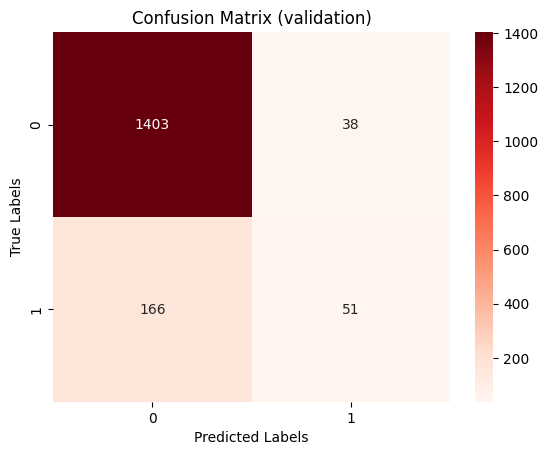

The roc auc of this model on the validation sets is:  0.8531213922743103


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_y, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (validation)")
plt.show()
print("The roc auc of this model on the validation sets is: ",auc_s)

In a confusion matrix, the cells represent the different outcomes of a binary classification problem based on the predicted and actual class labels.

1. True Positive (TP):
   - Definition: The model predicted a positive class label correctly, and the actual class label is also positive.
   - Interpretation: The model correctly identified instances that belong to the positive class (respiratory failure) as positive.


2. True Negative (TN):
   - Definition: The model predicted a negative class label correctly, and the actual class label is also negative.
   - Interpretation: The model correctly identified instances that do not belong to the positive class as negative. In the context of respiratory failure prediction, it means correctly identifying cases where respiratory failure is not present.


3. False Positive (FP):
   - Definition: The model predicted a positive class label incorrectly, while the actual class label is negative.
   - Interpretation: The model wrongly classified instances as positive (will have respiratory failure) when they are actually negative (will not have).


4. False Negative (FN):
   - Definition: The model predicted a negative class label incorrectly, while the actual class label is positive.
   - Interpretation: The model failed to identify instances that belong to the positive class (respiratory failure). These are the cases of missed predictions or false negatives.

<b> The confusion matrix presented above reflects that: <b>
- The model is very good in predicting correctly the people with no respiratory_failure
- Out of the people which truely have respiratory_failure, it predicts corrclty ~25%, we would have wanted to decrease the number of people in the "False Negative" cell and predict them correctly.
- Understanding the domain's needs, focusing on <b> Sensitivity </b> (the ability of a test to correctly identify patients with a disease) could be more meaningfull in some cases that AUC (depanding on what the doctors want to achieve)

## K - fold cross validation (ROC plot)

In [99]:
def KfoldPlot(X, y, clf, k):
    kf = KFold(n_splits=k)
    mean_auc = 0
    m_fpr = np.linspace(0, 1, 100)
    m_tpr = 0

    plt.figure(figsize=(8, 6))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        clf.fit(X.iloc[train_index], y.iloc[train_index])
        probs = clf.predict_proba(X.iloc[test_index])
        preds = probs[:, 1]
        
        fpr, tpr, _ = roc_curve(y.iloc[test_index], preds)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.3f})',color="blue")
        mean_auc += roc_auc / k

        interp_tpr = np.interp(m_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        m_tpr += interp_tpr / k

    plt.plot(m_fpr, m_tpr, label=f'Mean ROC (AUC = {mean_auc:.3f})', color='red')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic {clf}')
    plt.legend(loc='lower right')
    print("the exact mean auc is:",mean_auc)
    plt.show()

the exact mean auc is: 0.8442195277884756


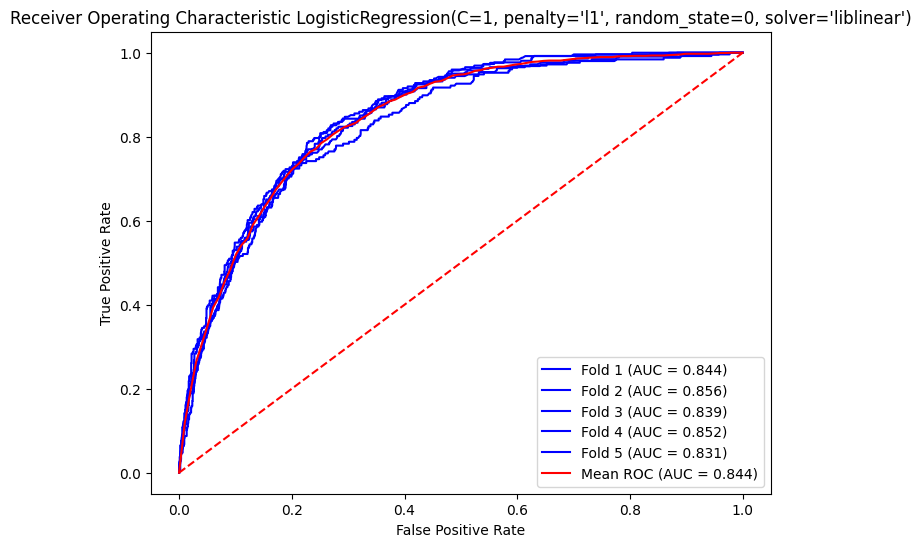

the exact mean auc is: 0.8142822207233781


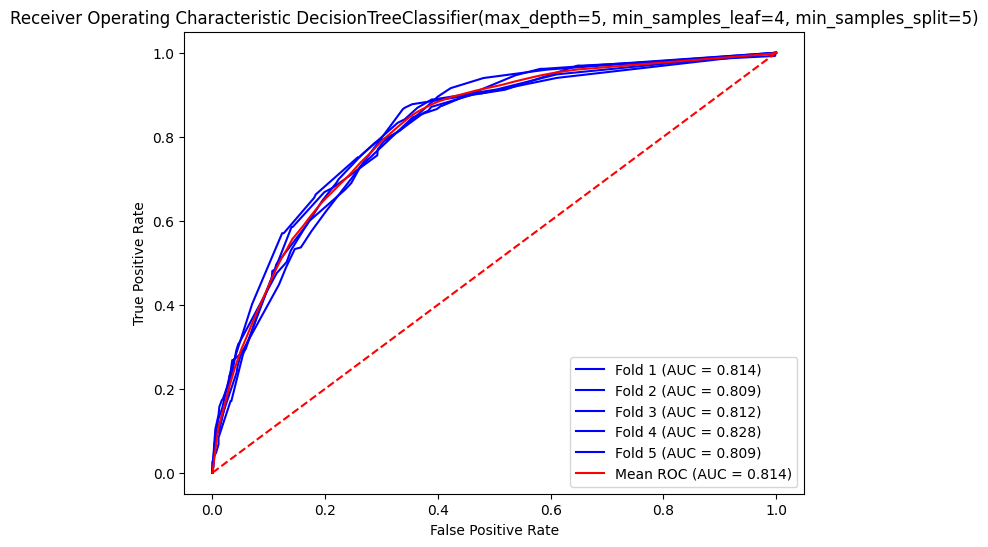

the exact mean auc is: 0.8436335119161665


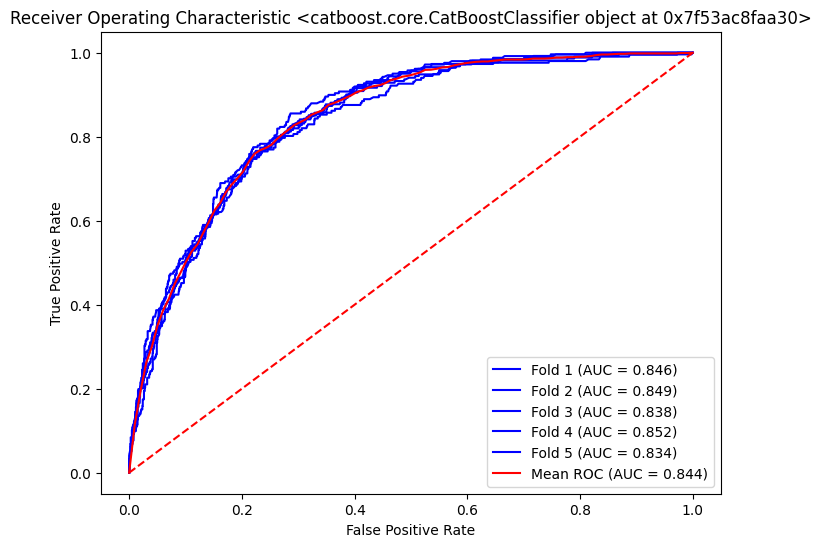

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/s

the exact mean auc is: 0.8440533538283311


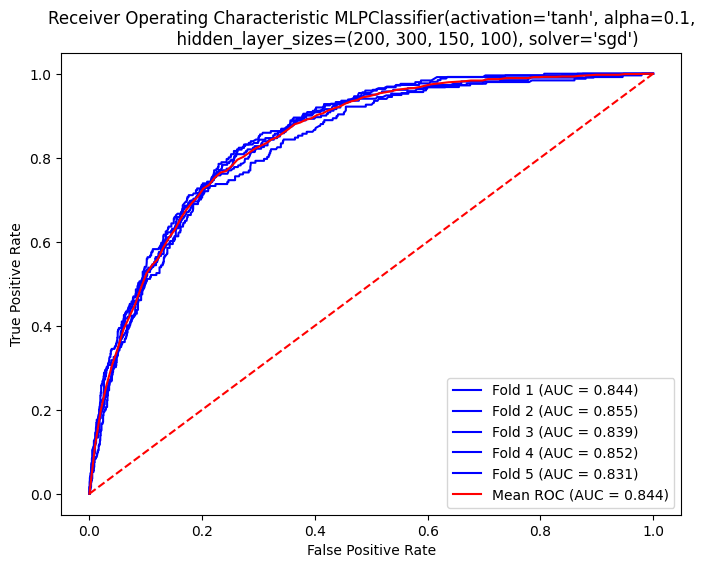

In [100]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, accuracy_score

for clf in models:
    KfoldPlot(X,y,clf,5)

<B> Is our model overfitted? <b> - NO!

- By Validating the model (using the trained model to make predictions on your validation dataset and evaluate its performance) helped us understand that the model generalizes well to unseen data.
- The model's performance is not significantly better on the training set compared to the validation set.
- During the project we tok actions to prevent it to be overfitted; dimensions reduction, using cross validation, looking that there are no major differences between the results on the train and test sets, etc...

# Part E - Predict

In [101]:
best_model = clf_mlp

<b> before predicting, train the best model on the whole data <b>

In [102]:
best_model.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(activation='tanh', alpha=0.1,
              hidden_layer_sizes=(200, 300, 150, 100), solver='sgd')

In [103]:
print(f'The shape of the test df is {test_df.shape} - validation that no rows were dropped')
print("________________________________")
check_nulls(test_df)

The shape of the test df is (1000, 26) - validation that no rows were dropped
________________________________
the amount of nulls in bmi 0
the amount of nulls in alcohol 0
the amount of nulls in stroke 0
the amount of nulls in physical_health 0
the amount of nulls in mental_health 0
the amount of nulls in walk_difficulty 0
the amount of nulls in age 0
the amount of nulls in diabetes 0
the amount of nulls in exercise 0
the amount of nulls in overall_health 0
the amount of nulls in sleep_time 0
the amount of nulls in bronchial_asthma 0
the amount of nulls in A 0
the amount of nulls in height 0
the amount of nulls in weight 0
the amount of nulls in pregnancy 0
the amount of nulls in gender_Female 0
the amount of nulls in gender_Male 0
the amount of nulls in gender_unknown 0
the amount of nulls in other_condition_Kidney cancer 0
the amount of nulls in other_condition_No cancer 0
the amount of nulls in other_condition_Skin cancer 0
the amount of nulls in other_condition_unkown 0
the amount

In [104]:
predicted_proba = best_model.predict_proba(test_df[comp_lst])
probs = predicted_proba[:, 1]
index = [i for i in range(0,1000)]


result_df = pd.DataFrame({"id": index, "predict_prob": probs})
result_df

id  predict_prob
0      0      0.758739
1      1      0.029276
2      2      0.437734
3      3      0.032387
4      4      0.500793
..   ...           ...
995  995      0.008252
996  996      0.208286
997  997      0.096814
998  998      0.024710
999  999      0.058873

[1000 rows x 2 columns]

In [105]:
result_df.to_csv('Submission_24.csv', index=False)

# Back up

## General

In [106]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA

# # Assuming your DataFrame is named train_df

# # Select the features for PCA
# features = pca_df.drop(columns=['respiratory_failure'])

# # Perform PCA
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(features)

# # Create a new DataFrame with the PCA results
# pca_df2 = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# # Add the "respiratory_failure" column to the PCA DataFrame
# pca_df2['respiratory_failure'] = train_df['respiratory_failure']

# # Create a figure and a 3D plot
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot for 3D visualization
# scatter = ax.scatter(pca_df2['PC1'], pca_df2['PC2'], pca_df2['PC3'], c=pca_df2['respiratory_failure'], cmap='bwr')

# # Set colors for the legend
# colors = ['red', 'blue']
# labels = ['0', '1']
# legend = ax.legend(handles=scatter.legend_elements()[0], labels=labels, loc='upper right')
# for i, text in enumerate(legend.get_texts()):
#     text.set_color(colors[i])

# # Set labels and title for the plot
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.set_title('3D Plot of PCA with "respiratory_failure"')

# # Display the plot
# plt.show()

In [107]:
# X = pca_df.drop(columns=['respiratory_failure'])
# y = pca_df['respiratory_failure']

# # Perform PCA
# pca = PCA()
# pca.fit(X)

# # Determine the number of components to select (e.g., top 5)
# n = 20

# # Get the indices of the n components with the highest explained variance ratio
# top_n_indices = pca.explained_variance_ratio_.argsort()[::-1][:n]

# # Get the corresponding column names from the original DataFrame
# top_n_columns = X.columns[top_n_indices]

# # Return the top n columns
# top_n_columns_list = top_n_columns.tolist()
# print(f"The top {n} columns for predicting respiratory_failure are: {top_n_columns_list}")

In [108]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA

# # Assuming your DataFrame is named train_df

# # Select the features for PCA
# features = pca_df[top_n_columns_list]

# # Perform PCA
# pca = PCA(n_components=3)
# pca_result = pca.fit_transform(features)

# # Create a new DataFrame with the PCA results
# pca_df2 = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# # Add the "respiratory_failure" column to the PCA DataFrame
# pca_df2['respiratory_failure'] = train_df['respiratory_failure']

# # Create a figure and a 3D plot
# fig = plt.figure(1, figsize=(12, 9))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot for 3D visualization
# scatter = ax.scatter(pca_df2['PC1'], pca_df2['PC2'], pca_df2['PC3'], c=pca_df2['respiratory_failure'], cmap='bwr')

# # Set colors for the legend
# colors = ['red', 'blue']
# labels = ['0', '1']
# legend = ax.legend(handles=scatter.legend_elements()[0], labels=labels, loc='upper right')
# for i, text in enumerate(legend.get_texts()):
#     text.set_color(colors[i])

# # Set labels and title for the plot
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.set_title('3D Plot of PCA with "respiratory_failure"')

# # Display the plot
# plt.show()

In [109]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split
# df6 =  train_df.copy()
# df6 = dummies(df6,columns_to_dummies)
# df6['age'] = df6['age']*100
# #df6['age'] = minmaxscaler.fit_transform(df6[['age']])

# #df6['sleep_time'] = minmaxscaler.inverse_transform(df6[['sleep_time']].values.reshape(-1, 1))

# df6 = df6[selected_features]
# # Split the data into features and target variable
# X = df6.drop('respiratory_failure', axis=1)  # Replace 'target_variable' with the actual column name
# y = df6['respiratory_failure']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the MLP classifier
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100))  # Specify the desired hidden layer sizes
# mlp.fit(X_train, y_train)

# # Predict probabilities for the test set
# y_pred_proba = mlp.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class

# # Calculate the AUC
# auc = roc_auc_score(y_test, y_pred_proba)
# print("AUC:", auc)


In [110]:
# # Import the required libraries
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score

# # Split the data into features (X) and target variable (y)
# X = df6.drop('respiratory_failure', axis=1)  # Replace 'target_variable' with the actual column name
# y = df6['respiratory_failure']  # Replace 'target_variable' with the actual column name

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest classifier object
# rf = RandomForestClassifier(n_estimators=200, random_state=42)  # You can adjust the number of estimators as per your requirement

# # Train the model on the training data
# rf.fit(X_train, y_train)

# # Predict probabilities for the test set
# y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

# # Calculate the AUC score
# auc = roc_auc_score(y_test, y_pred_prob)
# print(f"AUC: {auc}")


## K fold function

In [111]:
from sklearn.metrics import roc_curve, auc , roc_auc_score, r2_score, accuracy_score

def KfoldPlot(X, y, clf, k):
    kf = KFold(n_splits=k)
    mean_auc = 0
    m_fpr = np.linspace(0, 1, 100)
    m_tpr = 0

    plt.figure(figsize=(8, 6))

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        clf.fit(X[train_index], y[train_index])
        probs = clf.predict_proba(X[test_index])
        preds = probs[:, 1]
        
        fpr, tpr, _ = roc_curve(y[test_index], preds)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})',color="blue")
        mean_auc += roc_auc / k

        interp_tpr = np.interp(m_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        m_tpr += interp_tpr / k

    plt.plot(m_fpr, m_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', color='red')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

## optimize knn regressor function

In [112]:
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# def optimize_knn_regressor(train_x, train_y, test_x, test_y, param_grid):
#     # Create a KNN regressor
#     param_grid = {
#     'n_neighbors': [3, 5, 7,10,12,15,17,20],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
#     }
#     knn = KNeighborsRegressor()

#     # Perform grid search cross-validation
#     grid_search = GridSearchCV(knn, param_grid, cv=5)
#     grid_search.fit(train_x, train_y)

#     # Get the best hyperparameters and score
#     best_params = grid_search.best_params_
#     best_score = grid_search.best_score_

#     # Use the best model to predict on the test data
#     best_model = grid_search.best_estimator_
#     predictions = best_model.predict(test_x)

#     return best_params, best_score, predictions


In [113]:
# train_df4 = train_df.copy()
# train_df4 = train_df4.dropna()
# train_df4 = train_df4.drop('respiratory_failure',1)
# #train_df4['A'] = scalernorma.fit_transform(train_df4[['A']])

# cols_to_dumm = ["age", "mental_health","gender",'other_condition','overall_health']
# for col in cols_to_dumm:
#     train_df4 = dummies(train_df4,col)
    
# train = train_df4.sample(frac=0.8, random_state=200)
# test = train_df4.drop(train.index)
# train_x = train[train.columns.difference(["A"])]
# train_y = train["A"]
# test_x = test[test.columns.difference(["A"])]
# test_y = test["A"]

# best_params, best_score, predictions = optimize_knn_regressor(train_x, train_y, test_x, test_y, param_grid)

## Check missing data type function

In [114]:
# def check_missing_data_type(df, col_name):
#     # Create a new DataFrame with only the selected column and a missingness indicator
#     data = df[[col_name]].copy()
#     data['is_missing'] = np.where(data[col_name].isnull(), 1, 0)

#     # Check if missingness is related to the values of other variables (MAR)
#     if data['is_missing'].corr(data[col_name]) != 0:
#         print(f"The missing data in column '{col_name}' is Missing at Random (MAR).")
#     else:
#         # Check if missingness is related to the missing values themselves (MNAR)
#         if data['is_missing'].sum() != data[col_name].isnull().sum():
#             print(f"The missing data in column '{col_name}' is Missing Not at Random (MNAR).")
#         else:
#             print(f"The missing data in column '{col_name}' is Missing Completely at Random (MCAR).")

## Using catboost classifier

In [115]:
# train_df1 = train_df.copy()
# train_df1 = train_df1.dropna()
# train_df1 = train_df1.drop(columns = ['respiratory_failure', 'patient_id'])
# train_df1['A'] = robscaler.fit_transform(train_df1[['A']])


# cols_to_dumm = ["gender", "overall_health", "diabetes", "mental_health",'other_condition']
# for col in cols_to_dumm:
#     train_df1 = dummies(train_df1,col)

# col_name = "age"
# new_df = train_df1[pd.notnull(train_df1[col_name])]
# #new_df["gender"] = new_df["gender"].map(gender_mapping)
# X = new_df[new_df.columns.difference([col_name])]
# y = new_df[col_name] 


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # best_params, best_score, test_score, best_model = find_best_hyper_catboost(X_train, y_train, X_test, y_test)
# # print(best_params, best_score, test_score, best_model)
# # # Defining the CatBoost classifier
# clf = cb.CatBoostClassifier(iterations=1000, learning_rate=0.1, random_seed=42, loss_function='MultiClass')

# clf.fit(X_train, y_train, verbose=False)
  
# y_pred = clf.predict(X_test)

# probs = clf.predict_proba(X_test)
# preds = probs[:, 1]
# fpr, tpr, _ = roc_curve(y_test, preds)

# roc_auc = auc(fpr, tpr)
# accuracy = accuracy_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("roc_auc:", roc_auc)

In [116]:
# unique_values = train_df.apply(lambda x: x.unique())
# print(unique_values)